<h2 align=center> Facial Expression Recognition using CNN</h2>

### Task 1: Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
# from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.9.0


### Task 2: Plot Sample Image

In [2]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/"+expression))) + " " + expression + " images.")

3995 angry images.
436 disgust images.
4097 fear images.
7215 happy images.
4965 neutral images.
4830 sad images.
3171 surprise images.


### Task 3: Generate Training and Validation Batches

In [10]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("train/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("test/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7173 images belonging to 7 classes.


### Task 4: Create CNN Model

In [11]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\vikra\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Task 6: Train and Evaluate Model

In [12]:
epochs = 15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

# checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
#                             save_weights_only=True, mode='max',verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

# callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
#         callbacks=callbacks
)

Epoch 1/15
448/448 [==============================] - 126s 247ms/step - loss: 1.7920 - accuracy: 0.3118 - val_loss: 1.6980 - val_accuracy: 0.3730
Epoch 2/15
448/448 [==============================] - 24s 54ms/step - loss: 1.4818 - accuracy: 0.4304 - val_loss: 1.3064 - val_accuracy: 0.4933
Epoch 3/15
448/448 [==============================] - 25s 56ms/step - loss: 1.3345 - accuracy: 0.4896 - val_loss: 1.2748 - val_accuracy: 0.5039
Epoch 4/15
448/448 [==============================] - 27s 59ms/step - loss: 1.2487 - accuracy: 0.5223 - val_loss: 1.2743 - val_accuracy: 0.5152
Epoch 5/15
448/448 [==============================] - 28s 62ms/step - loss: 1.1970 - accuracy: 0.5420 - val_loss: 1.1941 - val_accuracy: 0.5442
Epoch 6/15
448/448 [==============================] - 27s 61ms/step - loss: 1.1576 - accuracy: 0.5571 - val_loss: 1.2125 - val_accuracy: 0.5393
Epoch 7/15
448/448 [==============================] - 28s 63ms/step - loss: 1.1208 - accuracy: 0.5742 - val_loss: 1.1067 - val_accurac

### Task 7: Represent Model as JSON String

In [14]:
model_json = model.to_json()
with open("my_model.json","w") as json_file:
    json_file.write(model_json)

In [15]:
model.save('my_model.h5')

In [3]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [2]:
new_model=tf.keras.models.load_model('my_model.h5')

In [4]:
import cv2

In [5]:
frame=cv2.imread('happy_boy.jpg')

In [6]:
frame.shape

(183, 275, 3)

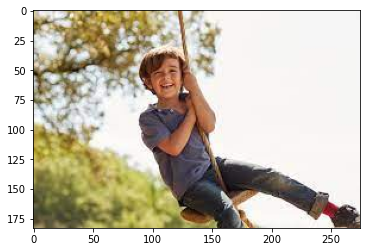

In [7]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [8]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [10]:
gray.shape

(183, 275)

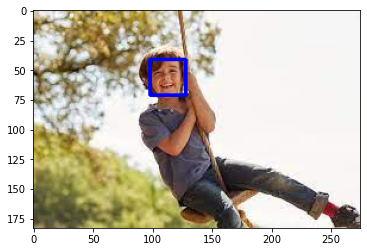

In [12]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [13]:
img = plt.imread('train/angry/Training_3908.jpg')

In [14]:
img.resize((48,48,1))

In [15]:
img.shape

(48, 48, 1)

In [18]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)



In [19]:
img_batch.shape

(1, 48, 48, 1)

In [20]:
new_model.predict(img_batch)

1/1 [==============================] - 3s 3s/step


array([[9.1947794e-01, 4.3942497e-04, 3.5467733e-02, 1.7657448e-02,
        1.2154089e-02, 6.5161926e-03, 8.2872026e-03]], dtype=float32)

In [5]:
img = plt.imread('train/happy/Training_158782.jpg')

<IPython.core.display.Javascript object>

In [21]:
img.resize((48,48,1))

In [22]:
img.shape

(48, 48, 1)

In [23]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)



In [24]:
img_batch.shape

(1, 48, 48, 1)

In [25]:
new_model.predict(img_batch)

1/1 [==============================] - 0s 112ms/step


array([[9.1947794e-01, 4.3942497e-04, 3.5467733e-02, 1.7657448e-02,
        1.2154089e-02, 6.5161926e-03, 8.2872026e-03]], dtype=float32)